<a href="https://colab.research.google.com/github/LuccaMello7/airbnb-buenos-aires-data-visualization/blob/main/AirbnbProject_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**Airbnb Data Analysis - Buenos Aires - Ciudad Autonoma de Buenos Aires (C.A.B.A) - Argentina**

![](https://drive.google.com/uc?export=view&id=1mHCvnwHH0eB8Di2zwOgytJOE09bbLqw3)

Argentina is perhaps one of the most incredible places in the world. In addition to all the incredible architecture that refers to the most incredible places in Europe, it weights of carrying on its back the land of the most human of gods - as [Galeano](https://en.wikipedia.org/wiki/Eduardo_Galeano) once said, referring of course to [Maradona](https://en.wikipedia.org/wiki/Diego_Maradona). 

Land of [Messi](https://en.wikipedia.org/wiki/Lionel_Messi),[Pope Francis](https://en.wikipedia.org/wiki/Pope_Francis), [Mafalda](https://en.wikipedia.org/wiki/Mafalda), [Piazzolla](https://en.wikipedia.org/wiki/Astor_Piazzolla) and so many other geniuses.

Much of the above and also for its culture, musicality, and gastronomy makes many tourists travel to Argentina to know a little more of the country. And nothing better than the capital of this country so it incredible to start my steps in Data Science and develop this project.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


##**Data Collection**
To work with this dataset, we will use Airbnb's Data.

Official data and open to the public of Airbnb - [Inside Airbnb](https://insideairbnb.com/get-the-data.html).

To structure our project well we will make the importation of the libraries we will use - make the importation of our file directly from the Airbnb site and there we will show the first 5 lines to see if we were successful in these first steps.

After that, we will start to clean up the data and raise some questions to go a little deeper into the subject and understand what we want to analyze and analyze the behavior of the people who visit the capital of Tango.



In [1]:
pip install ipython

In [2]:
#import relavant packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

In [3]:
#import dataset from Airbnb site for a Data Frame

df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2020-12-24/visualisations/listings.csv")

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,4998,2,26,2019-11-28,0.25,1,0
1,12463,Room in Recoleta - awesome location,48799,Matt,NaN,Recoleta,-34.59761,-58.39468,Private room,2249,1,20,2017-12-11,0.15,1,365
2,13095,Standard Room at Palermo Viejo B&B w pvt Bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,1,2018-12-18,0.04,7,365
3,13096,Standard Room in Palermo Viejo B&B,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,0,NaN,NaN,7,365
4,13097,Standard Room at Palermo Viejo B&B pvt bath,50994,Ariel,NaN,Palermo,-34.59348,-58.42949,Private room,2499,1,10,2019-11-27,0.44,7,0


In [5]:
# Conversion Function - Argentine Pesos to Dollar

def toDollar(registry):
  return float(registry['price']) * 0.011

In [6]:
# Criando coluna calculada

df['Price in Dollar'] = df.apply(toDollar, axis=1)

# **Variable Dictionary**



*   `id` - number to identify the property
*   `name` - name of the property
*   `host_id` - number of the host id
*   `host_name` - name of the host
*   `neighbourhood_group` - this column does not contain any valid value
*   `neighbourhood` - name of the neighbourhood
*   `latitude` - geographical latitude coordinate of the property
*   `longitude` - geographical longitude coordinate of the property
*   `room_type` - informs the type of room that is offered
*   `price` - price to rent the property
*   `minimum_nights` - minimum number of nights to book
*   `number_of_reviews` - number of reviews the property has
*   `last_review` - date from last review
*   `reviews_per_month` - amout of reviews per month
*   `calculated_host_listings_count` - number of properties of the same host
*   `availability_365` - number of days of availability within 365 days

Before going to the analysis, let`s check the face of our dataset analyzing the first 5 entries



# **Data Analysis**

This section has as an objective to allow the understanding of how the data is structured.



Let`s find out how many inputs we have in our Dataset and see the different types of each column. This dataset we are using is only a summarized version of Airbnb. On the same page, we've downloaded the file *listings.csv* you will also see the complete version in the same page.

In [ ]:
#identify the data volume of the DataFrame
print("Entries: \t {}".format(df.shape[0]))
print("Variables: \t {} \n".format(df.shape[1]))

display(df.dtypes)

In [8]:
#show me the first 5 inputs

df.head()
df['neighbourhood'].unique

<bound method Series.unique of 0              Palermo
1             Recoleta
2              Palermo
3              Palermo
4              Palermo
             ...      
20631         Recoleta
20632        Balvanera
20633         Recoleta
20634          Palermo
20635    Puerto Madero
Name: neighbourhood, Length: 20636, dtype: object>

###Q1. What the absent percentage of values in the dataset?

The quality of a dataset is directly related to the number of absent values. It is important to understand early if these null values are so significant compared to the number of inputs



*   It's possible to see that the column `neighbourhood_group` has 100% of your absent values. 
*   The variables `reviews_per_month` & `last_review` has absent values in 30% of the lines.



In [9]:
# decrescing 

(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.300688
last_review                       0.300688
name                              0.000242
host_name                         0.000194
Price in Dollar                   0.000000
latitude                          0.000000
host_id                           0.000000
neighbourhood                     0.000000
room_type                         0.000000
longitude                         0.000000
availability_365                  0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
id                                0.000000
dtype: float64

###Q2.What kind of variable types distribution?

To identify the variable distribution, we will plot a histogram.

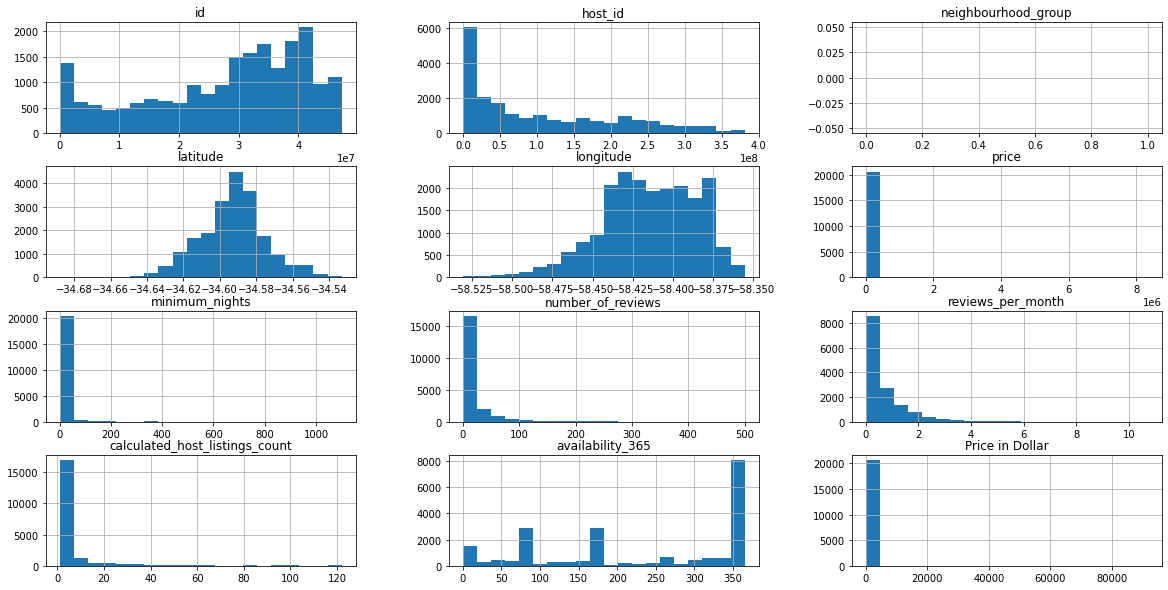

In [10]:
#plotting numerical variable histogram

df.hist(bins=20, figsize=(20,10));

###Q3. Are there any outliers in this process?

Values do not follow a distribution and distort all the graphic representation. To confirm, there are two fast ways helps to detect the outliers. Are they:



*   Statistical summary via `describe()` method
*   Plotting `boxplots` to the variable



In [11]:
#Check the statistical summary of number variables

df[['price','Price in Dollar', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,Price in Dollar,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.063600e+04,20636.000000,20636.000000,20636.000000,14431.000000,20636.000000,20636.000000
mean,4.820957e+03,53.030522,6.441316,16.460845,0.699708,7.522873,231.519626
std,6.136472e+04,675.011922,19.423860,33.570021,0.833883,17.278160,130.819993
min,0.000000e+00,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.583000e+03,17.413000,2.000000,0.000000,0.140000,1.000000,90.000000
50%,2.499000e+03,27.489000,3.000000,3.000000,0.390000,2.000000,267.500000
75%,3.998000e+03,43.978000,5.000000,17.000000,0.955000,4.000000,364.000000
max,8.329659e+06,91626.249000,1100.000000,500.000000,10.710000,122.000000,365.000000


Looking at the statistical model above, we can see some hypotheses, like:



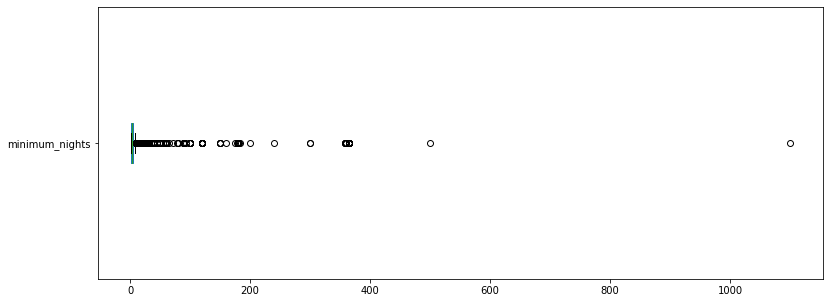

minimum_nights: values above 7:
2353 input
11.4024%


minimum_nights: values above 14:
1757 input
8.5142%


In [12]:
#minimum nights

df.minimum_nights.plot(kind='box', vert=False, figsize = (13, 5))
plt.show()

#To people who enjoy a week in Buenos Aires
print("minimum_nights: values above 7:")
print("{} input".format(len(df[df.minimum_nights > 7])))
print("{:.4f}%".format((len(df[df.minimum_nights > 7]) / df.shape[0])*100))
print("\n")


#To people who spend two weeks in the city

print("minimum_nights: values above 14:")
print("{} input".format(len(df[df.minimum_nights > 14])))
print("{:.4f}%".format((len(df[df.minimum_nights > 14]) / df.shape[0])*100))



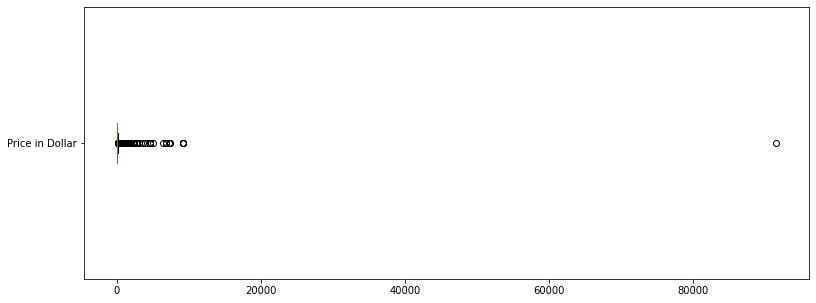


price: values above of 100
1245 input
6.0331%


In [13]:
df['Price in Dollar'].plot(kind='box', vert=False, figsize=(13, 5),)
plt.show()

# see amount above 1500 for price in dollar
print("\nprice: values above of 100")
print("{} input".format(len(df[df['Price in Dollar'] > 100])))
print("{:.4f}%".format((len(df[df['Price in Dollar'] > 100]) / df.shape[0])*100))

#### Histogram Without Outliers

Now that we've identified the Outliers in the variables. Let's clean the DataFrame and plot the graph again without the outliers in the histogram.

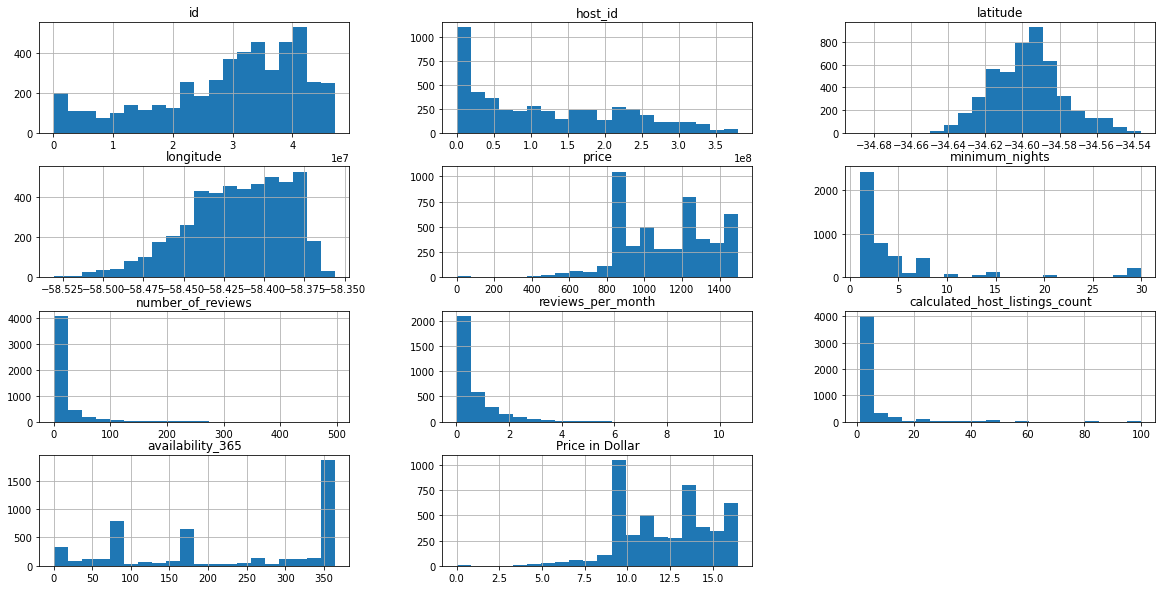

In [14]:
#removing outliers in a new DataFrame

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price >1500].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#removing `neighbourhood_group`, sine it is empty

df_clean.drop('neighbourhood_group', axis = 1, inplace = True)

#plotting the histogram to see the numerical variables

df_clean.hist(bins= 20, figsize = (20,10));

### Q4. **What is the average rent?**



In [15]:
#Check the price column media

print('Average price in `Pesos Argentinos` is: '  + str (df_clean['price'].mean()))


Average price in `Pesos Argentinos` is: 1106.6740467404675


In [16]:
#Check the price column media

print('Average price in `Dollar` is: '  + str (df_clean['Price in Dollar'].mean()))

Average price in `Dollar` is: 12.173414514145326


###Q5. Which neighbourhood is more expensive?

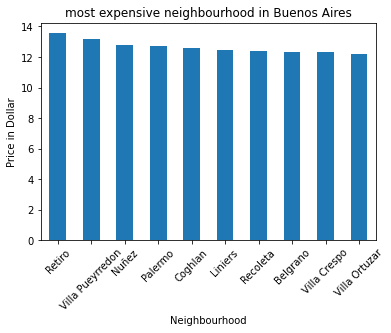

neighbourhood
Retiro              13.571432
Villa Pueyrredon    13.165533
Nuñez               12.756143
Palermo             12.750163
Coghlan             12.569652
Liniers             12.465750
Recoleta            12.400365
Belgrano            12.336557
Villa Crespo        12.326072
Villa Ortuzar       12.209607
Name: Price in Dollar, dtype: float64


In [17]:
#check prices by neighbourhood

df_clean.groupby(['neighbourhood'])['Price in Dollar'].mean().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('most expensive neighbourhood in Buenos Aires')
plt.xlabel('Neighbourhood')
plt.ylabel('Price in Dollar')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['Price in Dollar'].mean().sort_values(ascending=False)[:10])

###Q6. What's the cheapest Neighbourhood to stay in Buenos Aires?

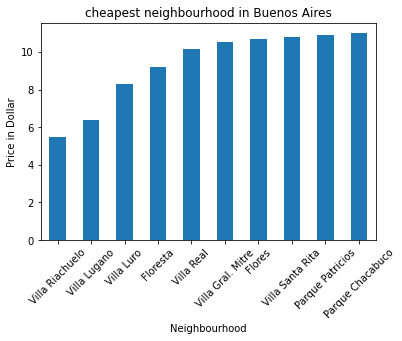

neighbourhood
Villa Riachuelo       5.500000
Villa Lugano          6.380000
Villa Luro            8.286667
Floresta              9.187000
Villa Real           10.131000
Villa Gral. Mitre    10.542278
Flores               10.690547
Villa Santa Rita     10.786187
Parque Patricios     10.910472
Parque Chacabuco     10.998900
Name: Price in Dollar, dtype: float64


In [18]:
#check prices by neighbourhood

df_clean.groupby(['neighbourhood'])['Price in Dollar'].mean().sort_values(ascending=True)[:10].plot(kind='bar')
plt.title('cheapest neighbourhood in Buenos Aires')
plt.xlabel('Neighbourhood')
plt.ylabel('Price in Dollar')
plt.xticks(rotation=45)

plt.show()

print(df_clean.groupby(['neighbourhood'])['Price in Dollar'].mean().sort_values(ascending=True)[:10])

###Q7. Would possible to stay in the most expensive neighborhoods paying cheap per day?

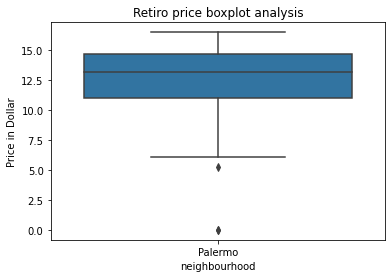

In [19]:
sns.boxplot(x = "neighbourhood", y= "Price in Dollar", data=df_clean.loc[df['neighbourhood'] == 'Palermo'])
plt.title("Retiro price boxplot analysis")
plt.show()

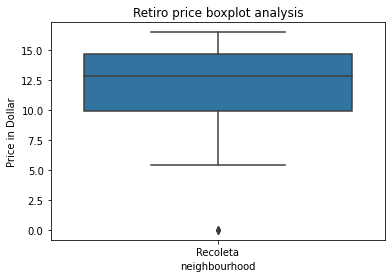

In [20]:
sns.boxplot(x = "neighbourhood", y= "Price in Dollar", data=df_clean.loc[df['neighbourhood'] == 'Recoleta'])
plt.title("Retiro price boxplot analysis")
plt.show()

###Q8. What type of property is most rented in Airbnb?

Checking our dataset we can see that the variable `room_type` column indicates the type of rental which is advertised on Airbnb. For those people who do not know, on this website, there are options of apartments / whole houses waiting to be rented and even only one room or share the room with other people.

Below we will count the number of occurrences of each type of rental, using the method `value_counts()`.

In [21]:
#show the quantity of each type of property available

df_clean.room_type.value_counts()

Private room       2251
Entire home/apt    2208
Shared room         352
Hotel room           67
Name: room_type, dtype: int64

In [22]:
#show the percentage of each type of property available

df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.461460
Entire home/apt    0.452645
Shared room        0.072161
Hotel room         0.013735
Name: room_type, dtype: float64

####What the Data Say?

What we can see above is that 46% of the rented properties are private rooms and 45% are whole property, i.e. the sum of these two categories accounts for more than 91% of the total rented property. I believe that this scenario is due to some factors such as privacy and also the devaluation of the currency - which makes it easier for people to rent an entire flat, for example.

####Go Beyond the Data

If you want to know more about the Argentine Pesos Crises, then I`d suggest you take some time to read and analyze the following data and article:



*   [ US Dollar (USD) to Argentine Peso (ARS) exchange rate history ](https://www.exchangerates.org.uk/USD-ARS-exchange-rate-history.html)
*   [Money and Inflation in Argentina - Reed College - Study Case - Portland, US](https://www.reed.edu/economics/parker/f10/201/cases/Argentina.html)



###Q9.Price per location

As Latitudes and Longitudes are provided for the properties, we can plot each point. For this to be possible and feasible, we will take account of **x = longitude** and **y= latitude** and we can plot the following heat map to see if there is a price discrepancy according to location.

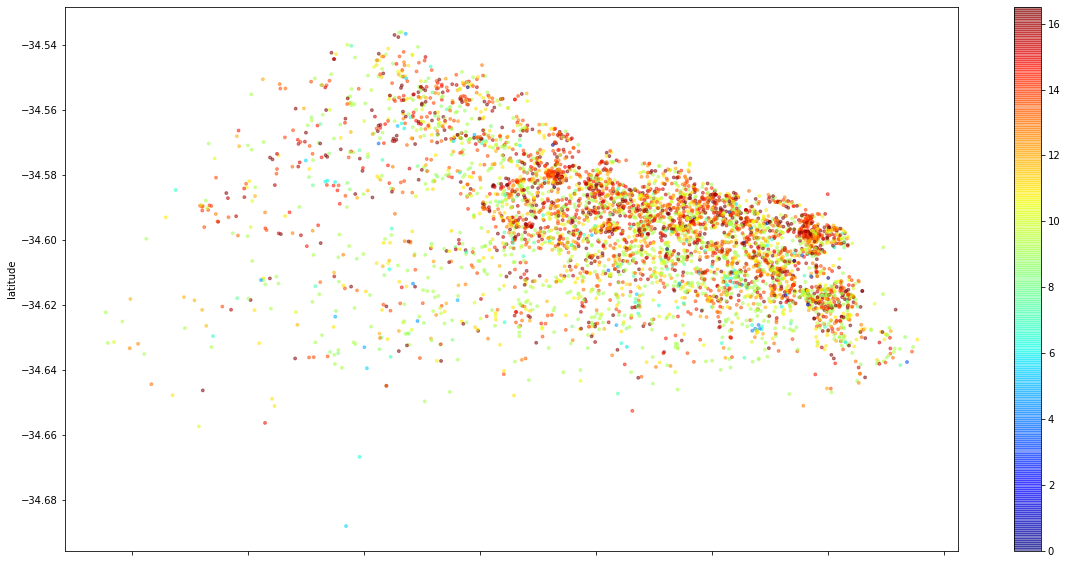

In [23]:
#plotting properties by latitude-longitude

df_clean.plot(kind='scatter', x = 'longitude', y = 'latitude', alpha = 0.5, c=df_clean['Price in Dollar'], s=8, cmap=plt.get_cmap('jet'), figsize=(20,10))

###Q10 - Group by Neighbourhood and Analyzing the Prices.

In [24]:
#Group by region and analyze the price in Argentinian Pesos
region_agg = df_clean.groupby(by='neighbourhood', as_index=False)
region_avg_price = region_agg.price.mean().sort_values(by='price')
region_avg_price

,neighbourhood,price
44,Villa Riachuelo,500.000000
39,Villa Lugano,580.000000
40,Villa Luro,753.333333
13,Floresta,835.181818
43,Villa Real,921.000000
38,Villa Gral. Mitre,958.388889
12,Flores,971.867925
45,Villa Santa Rita,980.562500
24,Parque Patricios,991.861111
22,Parque Chacabuco,999.900000


### Q11. **Why Retiro is one of the neighbourhoods with the highest media per rental**?

If you have never visited Buenos Aires I will give you some of my personal experience of having visited this city at least five times in the last ten years. Yes, that's a lot but I'm passionate about this city, about the people - even if you think there is a strong rivalry between Brazilians and Argentines, the truth is that we like each other very much if you don't believe it, see for yourself a trip there. 

Retiro is a very quiet neighbourhood, with calm streets, surrounded by parks 
and where you feel very safe. It is also very close to the neighbourhoods of Recoleta and Palermo where you will find a bit more agitated nightlife and Retiro also expensive. In Retiro, you will find the `Plaza San Martín` - a square that gives its name to the [general who led the independence of Argentina](https://en.wikipedia.org/wiki/Jos%C3%A9_de_San_Mart%C3%ADn) and helped in the independence of other South American countries.

Still, about the neighbourhood, many people prefer to spend their evenings in the busiest neighbourhoods and end up using the Retiro neighbourhood as a sleeping quarters.

![](https://drive.google.com/uc?export=view&id=1FCmyKzUzE5L0F8IbCqXg2MSxns9zEbCG)

*A photo of me visiting Palermo, inside the Jardin Japones, a very beautiful place located in the heart of the neighbourhood*




### Q12. **Why Villa Riachuelo is one of the neighbourhoods with the lowest media per rental**?

On the other hand, we have Villa Riachuelo as one of the most distant neighbourhoods of the micro center / San Nicolas neighbourhood - where there is a very high level of urban mobility and you can easily move to any other neighbourhood. 

Villa Riachuelo is very close to the cities of Lanus and Banfield and possibly the only attraction in the neighborhood besides its price is the **Autodromo Juan & Oscar Alfredo Gálvez** where some Formula 1 races took place and where the French [Alain Prost](https://en.wikipedia.org/wiki/Alain_Prost) scored his first point. 


The Region with the lowest average price is Villa Riachuelo, with an average value of 500.0 Argentinian Pesos
The Region with the highest average price is Retiro, with an average value of 1233.77 Argentinian Pesos


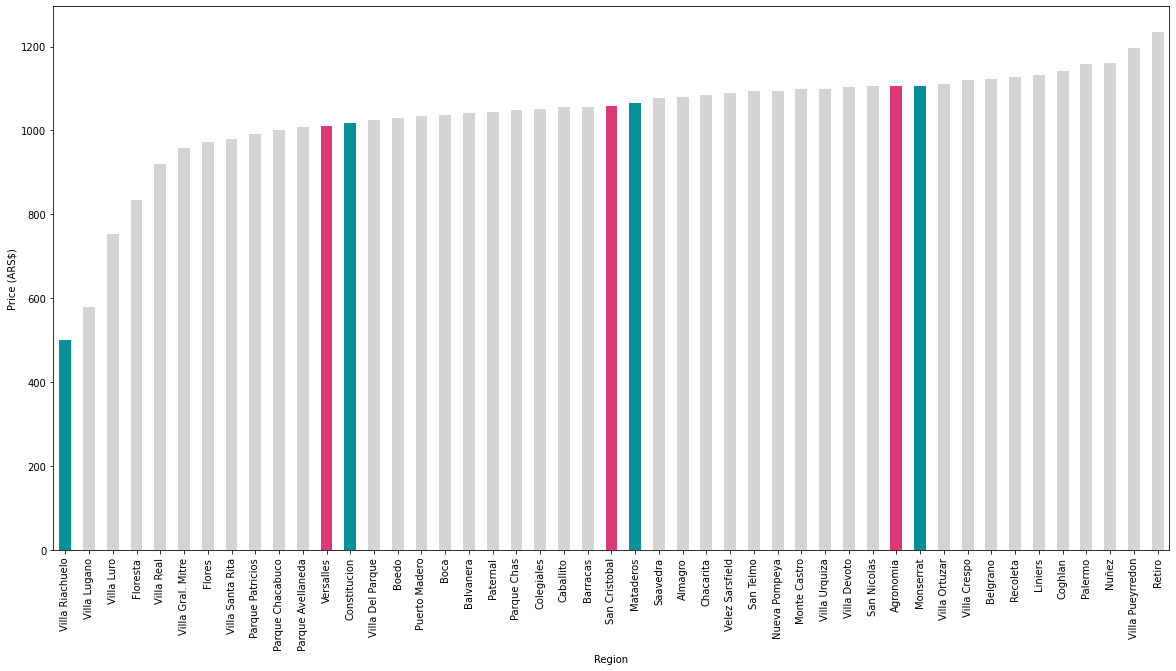

In [26]:
neutral = '#d4d4d4'
colors=['#089099', neutral , neutral, neutral, neutral, neutral, neutral , neutral, neutral, neutral, neutral,'#DC3977']
plot= region_avg_price.plot(color=colors, kind='bar', x='neighbourhood', y='price', legend=False, figsize = (20, 10))
plot.set_xlabel('Region');
plot.set_ylabel('Price (ARS$)');

print('The Region with the lowest average price is {}, with an average value of {} Argentinian Pesos'.format(region_avg_price.iloc[0,0],round(region_avg_price.iloc[0,1],2)))
print('The Region with the highest average price is {}, with an average value of {} Argentinian Pesos'.format(region_avg_price.iloc[-1,0],round(region_avg_price.iloc[-1,1],2)))

###Q13. What is the correlation between the variables

Verify how much a variable correlates with another, the intention is to verify if the `increase of one variable directly influences the increase or decrease of another`.

**It is always important to remember that correlation does not necessarily mean causality**.

The ratio can be measured, and it is a function of the correlation coefficient to establish its intensity. To identify the existing correlations between the variables of interest, I will:



*   Create a correlation matrix
*   Generate a heatmap from this matrix, using the seaborn library






In [27]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


#show correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.043975,0.095961,0.120992,0.078639,-0.025271
minimum_nights,0.043975,1.000000,-0.093460,-0.133563,0.211866,0.026526
number_of_reviews,0.095961,-0.093460,1.000000,0.767899,-0.015113,-0.030858
reviews_per_month,0.120992,-0.133563,0.767899,1.000000,0.011596,-0.128775
calculated_host_listings_count,0.078639,0.211866,-0.015113,0.011596,1.000000,0.001803
availability_365,-0.025271,0.026526,-0.030858,-0.128775,0.001803,1.000000


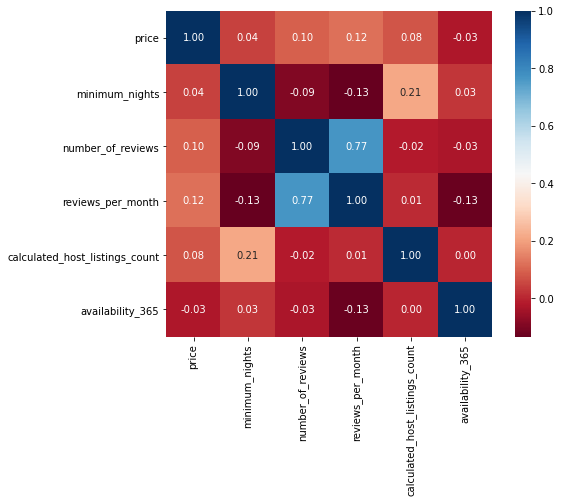

In [28]:
fig= plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

###### In order to understand the heat map above we will need to know the following:

*Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases*

With the heatmap above, we can see that the only variables that have a significant correlation is the `number_of_reviews` with the `reviews_per_month`. The other variables do not have a great relationship with each other.

#Conclusion

After analyzing the data we can draw the following conclusions:

Buenos Aires remains a destination with many visitors and these visitors tend to settle in noble neighborhoods close to other neighborhoods with a more hectic nightlife and close to tourist spots.

According to the heat map and my personal view of the city, we can see that the same people who rent the properties choose to have a wider range of urban mobility. Areas where the metro, train, bus and bike, and even the number of Uber cars have a higher volume.

If you are thinking of visiting Buenos Aires I would recommend the following attractions that you need to try:

Visit the [San Telmo Fair](https://lajollamom.com/san-telmo-fair-buenos-aires/?ver=true) and take a photo with [Mafalda](https://en.wikipedia.org/wiki/Mafalda) and learn a little more about the history of [Quino](https://en.wikipedia.org/wiki/Quino), a great Argentine cartoonist and historian.

If you choose to go for a night walk in the Palermo Woods and its Botanical Garden, my recommendation is the bars and restaurants of Palermo Soho and also the Recoleta neighbourhood. Recoleta is a very charming neighbourhood and I strongly recommend a visit to the cemetery of the neighbourhood to visit the tomb of [Evita Peron](https://en.wikipedia.org/wiki/Eva_Per%C3%B3n) - actress and political leader of Argentina who defended the female vote - the cemetery is very beautiful and full of works of art in its mausoleums.

Don't forget to visit the La Boca neighbourhood where you'll find many colourful houses - these colourful houses were painted with the paints left over from the ships and that's also where the tango started to appear. And of course, we cannot forget to mention that it is also the neighbourhood of the Boca Juniors club which has its colours in yellow and blue because in the nearby port a Swedish ship was sighted - and for this reason, they are nicknamed *Xeneizes* - or Genoese. In La Boca you can also meet Caminito which is named after a famous tango sung by Carlos Gardel.

I could talk for hours and hours about the places you should visit, but I believe that with the work done above you can see the best cost-benefit from where to stay using the Airbnb platform together with a map of tourist points of the city.

For now, I leave with you the most important tango - in my opinion - because it is the biggest name of contemporary tango, [Astor Piazzolla](https://en.wikipedia.org/wiki/Astor_Piazzolla)

![](https://drive.google.com/uc?export=view&id=10mqwTBxtnV4ehArVfzXU_kUTGFSAhgj5)

This tango was composed in homage to his father and we can see that as the music goes on - Piazzolla leads us to the speed of his father's heartbeats through the [Bandoneon](https://en.wikipedia.org/wiki/Bandoneon). Below, enjoy one of the most beautiful tangos ever composed: [Adios Nonino](https://en.wikipedia.org/wiki/Adiós_Nonino)

Enjoy the trip! And be sure to share this information with me if it was useful when deciding which neighborhood and type of property you stayed in.



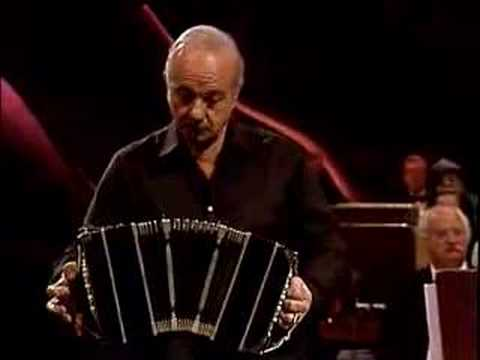

In [29]:
from IPython.display import YouTubeVideo
YouTubeVideo('VTPec8z5vdY')